## Behavioural analysis of data

**Muhle-Karbe and Sheahan et al, 2022**. Goal-seeking compresses neural codes for space in the human hippocampus and orbitofrontal cortex.

Author: Hannah Sheahan, sheahan.hannah@gmail.com

Original code: Dec 2018

Code tidied: 02/11/2022

### TOC:
- Data loading
- Metadata analysis
- Learning analysis
- Explicit knowledge of rules / quiz scores
- Occupancy heatmap and transitions


In [1]:
# @title Load the data.

# Modules to be downloaded from our github.
import constants as cs
import analysis_helpers as nav

import json
import os
import matplotlib.pyplot as plt
import copy
import csv
import scipy
from typing import List, Sequence, Mapping, Tuple, Any
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from datetime import datetime, timedelta

# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

SESSIONS = ['session_1/','session_2/']
SAVE_PATH = 'drive/MyDrive/four_rooms/generated_figures/'
DATA_PATH = 'drive/MyDrive/four_rooms/behavioural_data/hannah_preprocessed_behaviour/'
RAW_PATH = 'drive/MyDrive/four_rooms/behavioural_data/raw_behaviour/'
COLOURS = ['royalblue', 'firebrick']

excluded_subjects = ['313a','322a', '313b', '322b']  # Experiment/fMRI crashed.

# Find and load the data from both training and test sessions.
file_paths, num_subjects = nav.find_data(DATA_PATH, SESSIONS, excluded_subjects)
all_data, file_paths = nav.load_data(file_paths, num_subjects, SESSIONS)

# The ordered file names only.
file_names = []
session_files = []
data_prefix_len = len(DATA_PATH + SESSIONS[0] )
for session in file_paths:
  for file in session:
    session_files.append(file[data_prefix_len:])
  file_names.append(session_files)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data files found from both sessions for 27 participants.


Mean age: 27.25925925925926, +- 4.4354847961895985 std
On average train and test (scanner) sessions were: 32.0 +- 3.6 hours apart (mean +- SEM).


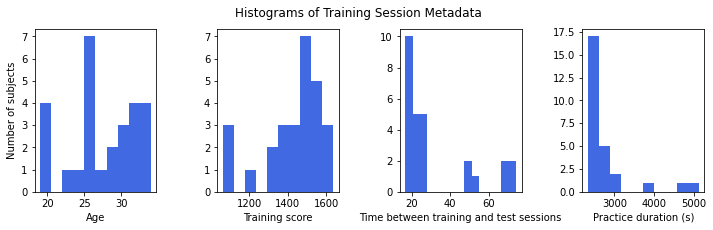

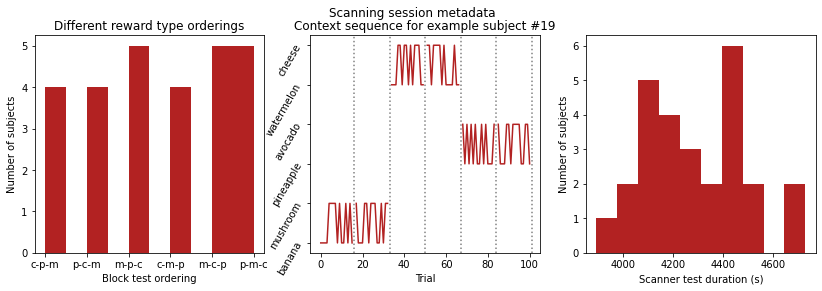

In [2]:
# @title Metadata analysis.

SAVE = False
nav.visualise_training_metadata(all_data, file_names, SAVE_PATH, COLOURS, SAVE)
nav.visualise_testing_metadata(all_data, file_names, SAVE_PATH, COLOURS, SAVE)

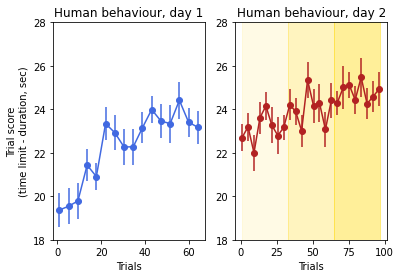

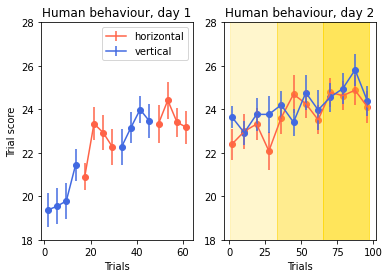

In [3]:
# @title Learning: Trial scores over time.
horizontal_contexts = ['martini','watermelon','banana','avocado']
vertical_contexts = ['cheese','peanut','mushroom','pineapple']

# Plot learning for trial scores collapsed over both contexts.
fig, ax = plt.subplots(1,2,figsize=(6,4))

# Training session.
_ = nav.plot_scores_learning(
    ax[0],
    all_data,
    cs.SESSION_TRAINING,
    SAVE_PATH,
    COLOURS,
    bunch_factor=4,
    ylim=(18,28),
    title='Human behaviour, day 1',
    ylabel='Trial score\n(time limit - duration, sec)',
)

# Testing/scaner session.
# Draw context colour rectangles to indicate the different reward pairs.
errorboxes = [
  [Rectangle((1, 0), 32, 100)], 
  [Rectangle((33, 0), 32, 100)],
  [Rectangle((33+32, 0), 32, 100)],
]
edgecolor = 'white'
facecolors = ['gold', 'gold', 'gold']
alphas = [0.1, 0.25, 0.4]
for box, facecolor, alpha in zip(errorboxes, facecolors, alphas):
  pc = PatchCollection(box, facecolor=facecolor, alpha=alpha, edgecolor=facecolor)
  ax[1].add_collection(pc)

_ = nav.plot_scores_learning(
    ax[1],
    all_data,
    cs.SESSION_SCANNER,
    SAVE_PATH,
    COLOURS,
    bunch_factor=4,
    ylim=(18,28),
    title='Human behaviour, day 2',
    ylabel='',
)

# Plot trial score divided into the two contexts.
fig, ax = plt.subplots(1,2, figsize=(6,4)) 
_, h1 = nav.plot_scores_training_context(ax[0], all_data, horizontal_contexts, colour = 'tomato', bunch_factor=4, title='', ylim=(18,28))
_, h2 = nav.plot_scores_training_context(ax[0], all_data, vertical_contexts, colour='royalblue', bunch_factor=4, title='',ylim=(18,28))
ax[0].legend([h1,h2], ['horizontal','vertical'])

_, h1 = nav.plot_scores_scanner_context(ax[1], all_data, horizontal_contexts, colour = 'tomato', bunch_factor=4, title='', ylim=(18,28))
_, h2 = nav.plot_scores_scanner_context(ax[1], all_data, vertical_contexts, colour='royalblue', bunch_factor=4, title='', ylim=(18,28))

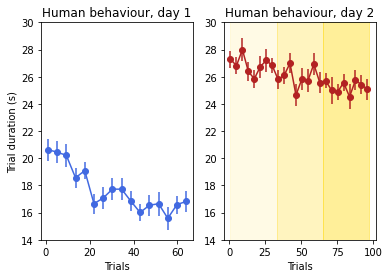

In [4]:
# @title Learning: Trial duration over time.

# Plot learning trial by trial for the training and test sessions.

fig, ax = plt.subplots(1,2,figsize=(6,4))

_ = nav.plot_duration_learning(
    ax[0],
    all_data,
    cs.SESSION_TRAINING,
    SAVE_PATH,
    COLOURS,
    bunch_factor=4,
    ylim=(14,30),
    title='Human behaviour, day 1',
    ylabel='Trial duration (s)',
)

# Testing/scaner session.
# Draw context colour rectangles to indicate the different reward pairs.
errorboxes = [
  [Rectangle((1, 0), 32, 100)], 
  [Rectangle((33, 0), 32, 100)],
  [Rectangle((33+32, 0), 32, 100)],
]
edgecolor = 'white'
facecolors = ['gold', 'gold', 'gold']
alphas = [0.1, 0.25, 0.4]
for box, facecolor, alpha in zip(errorboxes, facecolors, alphas):
  pc = PatchCollection(box, facecolor=facecolor, alpha=alpha,
                      edgecolor=facecolor)
  ax[1].add_collection(pc)  

_ = nav.plot_duration_learning(
    ax[1],
    all_data,
    cs.SESSION_SCANNER,
    SAVE_PATH,
    COLOURS,
    bunch_factor=4,
    ylim=(14,30),
    title='Human behaviour, day 2',
    ylabel='',
)

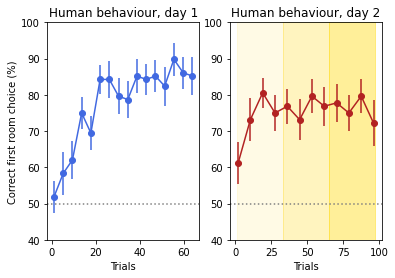

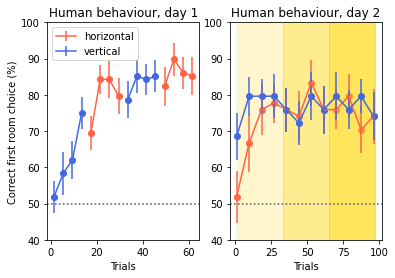

In [5]:
# @title Learning: First room choice accuracy over time.

# Plot room choice accuracy collapsed across both contexts.
fig, ax = plt.subplots(1,2, figsize=(6,4)) 
choices_train = nav.plot_cov_training(ax[0], all_data, COLOURS, bunch_factor=4)
choices_scan = nav.plot_cov_scanner(ax[1], all_data, COLOURS, bunch_factor=4)

# Plot room choice accuracy divided into the two different contexts.
fig, ax = plt.subplots(1,2, figsize=(6,4))
# Training session.
horiz_train, h1 = nav.plot_cov_training_context(ax[0], all_data, horizontal_contexts, colour = 'tomato', bunch_factor=4, title='')
vert_train, h2 = nav.plot_cov_training_context(ax[0], all_data, vertical_contexts, colour='royalblue', bunch_factor=4, title='')
ax[0].legend([h1,h2], ['horizontal','vertical'])

# Scanning session.
horiz_scan, h1 = nav.plot_cov_scanner_context(ax[1], all_data, horizontal_contexts, colour = 'tomato', bunch_factor=2, title='')
vert_scan, h2 = nav.plot_cov_scanner_context(ax[1], all_data, vertical_contexts, colour='royalblue', bunch_factor=2, title='')


Mean quiz score: 5.5/8, +-0.5
Chance performance quiz score would be: 2.7/8

Quiz score vs trial score:
Correlation Pearson's r: 0.445, p=0.020

Quiz score vs room choice accuracy:
Correlation Pearson's r: 0.813, p=0.0000002516


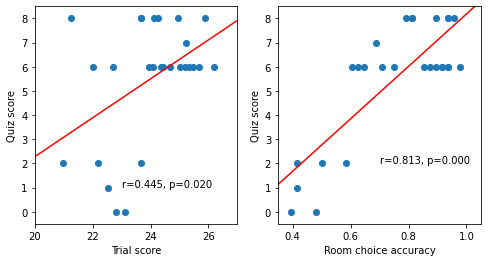

In [6]:
# @title Explicit knowledge of rules / quiz scores.

# Load the questionaire data
questionaire_reader = csv.DictReader(open(os.path.join(DATA_PATH, "questionaire.csv")))
questionaire_data = []
for row in questionaire_reader:
  if row['ID'] not in excluded_subjects:
    questionaire_data.append(row)

# Calculate the quiz scores.
subject_quiz_scores = nav.calculate_quiz_score(questionaire_data)

# Summarise the quiz score results.
sem_quiz_scores = np.std(subject_quiz_scores) / np.sqrt(len(subject_quiz_scores))
print('Mean quiz score: {:.1f}/8, +-{:.1f}'.format(np.mean(subject_quiz_scores), sem_quiz_scores))
random_score_expectation = (1/3) * 8  # Three options per question.
print('Chance performance quiz score would be: {:.1f}/8'.format(random_score_expectation))

# Correlations between quiz scores and other learning metrics.
fig, ax = plt.subplots(1,2, figsize=(8,4)) 

# Correlate quiz scores with trial scores on day 2:
day_2_trial_scores = []
for player_id in range(num_subjects):
  mean_score = all_data[cs.SESSION_SCANNER][player_id]["allScores"]
  mean_score = [i for i in mean_score if i is not None]
  day_2_trial_scores.append(np.nanmean(mean_score))

# Plot correlation between explicit quiz and trial scores.
x = day_2_trial_scores
y = subject_quiz_scores
ax[0].scatter(x, y)
ax[0].set_xlabel('Trial score')
ax[0].set_ylabel('Quiz score')

fit = np.poly1d(np.polyfit(x, y, 1))
ax[0].plot(range(20,28), fit(range(20,28)), 'red')
ax[0].set_xlim([20,27])
ax[0].set_ylim([-0.5,8.5])


r, p = scipy.stats.pearsonr(x, y)
print("\nQuiz score vs trial score:")
print("Correlation Pearson's r: {:.3f}, p={:.3f}".format(r,p))
s = "r={:.3f}, p={:.3f}".format(r,p)
_ = ax[0].text(23, 1, s, fontsize=10)

# Plot correlation between explicit quiz and room choice accuracy scores.
behaviour = nav.format_room_choices(ax, all_data)
accuracies = []
for subject_idx in range(num_subjects):
  accuracies.append(np.mean(behaviour[:,subject_idx]))
x = accuracies
y = subject_quiz_scores
ax[1].scatter(x, y)
ax[1].set_xlabel('Room choice accuracy')
ax[1].set_ylabel('Quiz score')

fit = np.poly1d(np.polyfit(x, y, 1))
ax[1].plot(np.linspace(0.35,1.05), fit(np.linspace(.35,1.05)), 'red')
ax[1].set_xlim([0.35,1.05])
ax[1].set_ylim([-0.5,8.5])

r, p = scipy.stats.pearsonr(x, y)
print("\nQuiz score vs room choice accuracy:")
print("Correlation Pearson's r: {:.3f}, p={:.10f}".format(r,p))
s = "r={:.3f}, p={:.3f}".format(r,p)
_ = ax[1].text(0.7, 2, s, fontsize=10)

In [7]:
# @title Load the raw data.
raw_data = []
for session_ind, session in enumerate(SESSIONS):
  session_path = os.path.join(RAW_PATH, session)
  raw_paths = os.listdir(session_path)
  raw_paths = [i for i in raw_paths if i[-6:] in ('a.json', 'b.json')]
  raw_data.append([])

  for subject_idx in range(len(raw_paths)):
    path = raw_paths[subject_idx]
    path = os.path.join(session_path, path)
    with open(path, "r") as f:
      data = json.load(f)
    raw_data[session_ind].append(data)

genders = []
for i in range(num_subjects):
  genders.append(raw_data[cs.SESSION_SCANNER][i]['participantGender'])
print('Total of female subjects: {}/{}'.format(sum([1 for i in genders if i == 1]), len(genders)))

Total of female subjects: 16/27


In [8]:
vertical_maps = ('FourRooms_cheese','FourRooms_mushroom','FourRooms_pineapple')
horizontal_maps = ('FourRooms_avocado','FourRooms_watermelon','FourRooms_banana')

# @title Amount of time spent under human vs agent control.

# For specific stats after the first reward has been found.
ALLOWED_STATES = (
    cs.STATE_GO,
    cs.STATE_MOVING1,
    cs.STATE_SHOWREWARD,
    cs.STATE_STAR1FOUND,
    cs.STATE_MOVING2,
    cs.STATE_STAR2FOUND,
    cs.STATE_HALLFREEZE,
)

players_human_time, players_computer_time = nav.compute_duration_per_agent(raw_data, num_subjects, ALLOWED_STATES)
print(f'Average time (sec) spent per trial with human in control: {np.mean(players_human_time)}')
print(f'Average time (sec) spent per trial with computer in control: {np.mean(players_computer_time)}')

Average time (sec) spent per trial with human in control: 14.331249999999995
Average time (sec) spent per trial with computer in control: 11.718179012345683


In [9]:
# @title Amount of time and transitions in each grid square.
# Note that this function is super duper slow to execute.

# For overall heatmap:
allowed_states = (
    cs.STATE_GO,
    cs.STATE_MOVING1,
    cs.STATE_MOVING2,
    cs.STATE_HALLFREEZE,
    cs.STATE_SHOWREWARD,
    cs.STATE_STAR1FOUND,
    cs.STATE_STAR2FOUND,
)
horiz_counts, vert_counts, horizontal_transitions, vertical_transitions = nav.compute_occupancy_and_transitions(raw_data, num_subjects, allowed_states, vertical_maps=vertical_maps, horizontal_maps=horizontal_maps)
transition_probs = nav.normalise_transitions(horizontal_transitions, vertical_transitions)

Verified: although behaviour appears visually similar between the two contexts,
the underlying data is not identical.


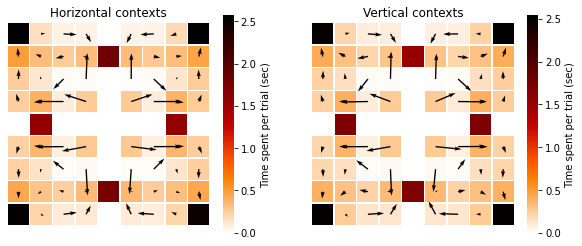

In [14]:
# Convert transition probebilities into vectors showing the average direction of travel.
transition_vectors = nav.vectorise_transitions(transition_probs)
nav.plot_transition_heatmap(horiz_counts, vert_counts, transition_vectors)

# Verify that the two contexts do have marginally different behaviours
# (i.e. that there is no copying bug).
assert transition_vectors['horizontal'][0][0] != transition_vectors['vertical'][0][0]
assert horiz_counts[0][0] != vert_counts[0][0]
print('Verified: although behaviour appears visually similar between the two'
  ' contexts,\nthe underlying data is not identical.')